In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

In [2]:
data = pd.read_csv('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.csv')
data['pclass'] = data['pclass'].map(str)    # pclassの型を文字列型に変換

In [3]:
data.columns

Index([u'pclass', u'survived', u'name', u'sex', u'age', u'sibsp', u'parch',
       u'ticket', u'fare', u'cabin', u'embarked', u'boat', u'body',
       u'home.dest'],
      dtype='object')

In [4]:
data.describe()

/usr/lib64/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,survived,age,sibsp,parch,fare,body
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,NaN,0.000000,0.000000,NaN,NaN
50%,0.000000,NaN,0.000000,0.000000,NaN,NaN
75%,1.000000,NaN,1.000000,0.000000,NaN,NaN
max,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [5]:
data[['age']].dropna().describe()

,age
count,1046.000000
mean,29.881138
std,14.413493
min,0.170000
25%,21.000000
50%,28.000000
75%,39.000000
max,80.000000


In [6]:
data[['fare']].dropna().describe()

,fare
count,1308.000000
mean,33.295479
std,51.758668
min,0.000000
25%,7.895800
50%,14.454200
75%,31.275000
max,512.329200


In [7]:
data[['body']].dropna().describe()

,body
count,121.000000
mean,160.809917
std,97.696922
min,1.000000
25%,72.000000
50%,155.000000
75%,256.000000
max,328.000000


(array([  56.,   30.,   29.,  133.,  195.,  166.,  115.,   95.,   72.,
          60.,   36.,   26.,   23.,    4.,    4.,    2.]),
 array([  0.17    ,   5.159375,  10.14875 ,  15.138125,  20.1275  ,
         25.116875,  30.10625 ,  35.095625,  40.085   ,  45.074375,
         50.06375 ,  55.053125,  60.0425  ,  65.031875,  70.02125 ,
         75.010625,  80.      ]),
 <a list of 16 Patch objects>)

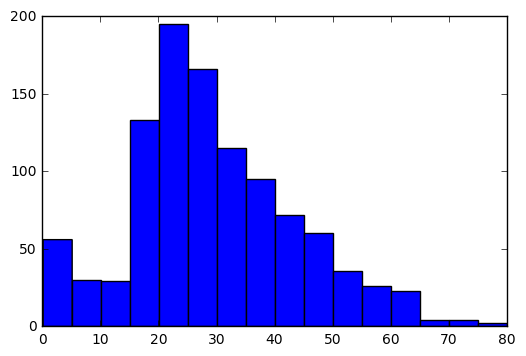

In [8]:
plt.hist(data.age.dropna(), bins=16)

(array([ 827.,  243.,  102.,   52.,   17.,   25.,    4.,    0.,   18.,
           3.,   13.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    4.]),
 array([   0.     ,   25.61646,   51.23292,   76.84938,  102.46584,
         128.0823 ,  153.69876,  179.31522,  204.93168,  230.54814,
         256.1646 ,  281.78106,  307.39752,  333.01398,  358.63044,
         384.2469 ,  409.86336,  435.47982,  461.09628,  486.71274,
         512.3292 ]),
 <a list of 20 Patch objects>)

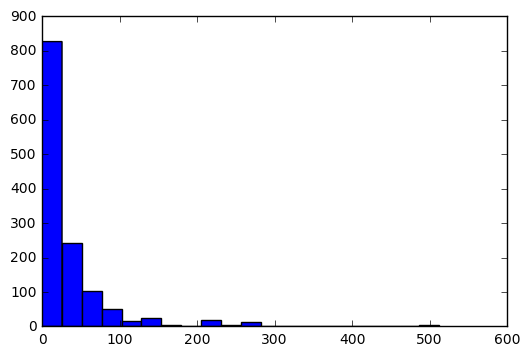

In [9]:
 plt.hist(data.fare.dropna(), bins=20)

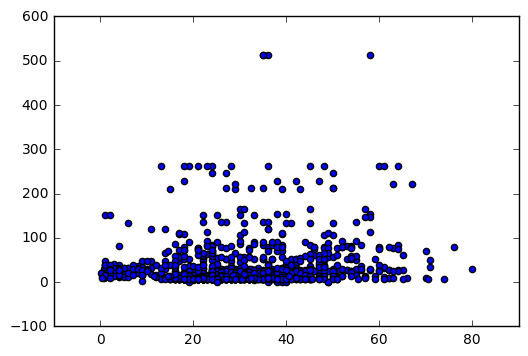

In [10]:
df = data[['age','fare']].dropna()
plt.scatter(df.age, df.fare)

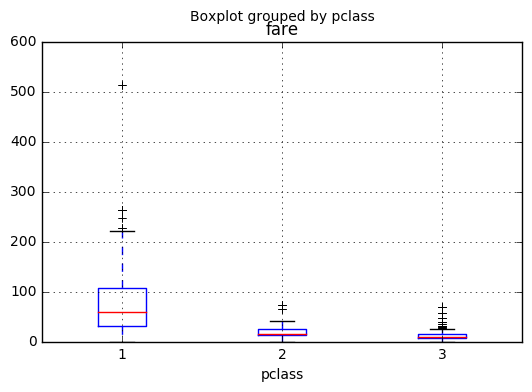

In [11]:
df = data[['fare','pclass']].dropna()
df.boxplot(column='fare', by='pclass')

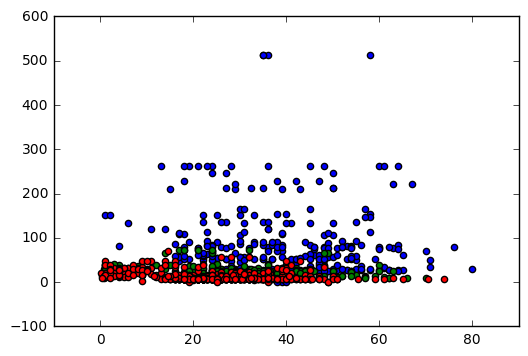

In [12]:
df1 = data[data.pclass=='1'][['age','fare']].dropna()
df2 = data[data.pclass=='2'][['age','fare']].dropna()
df3 = data[data.pclass=='3'][['age','fare']].dropna()
plt.scatter(df1.age,df1.fare,c='blue')
plt.scatter(df2.age,df2.fare,c='green')
plt.scatter(df3.age,df3.fare,c='red')

In [13]:
df = data[['sex','survived']].dropna()
pd.crosstab(df.sex, df.survived)

survived,0,1
sex,,
female,127,339
male,682,161


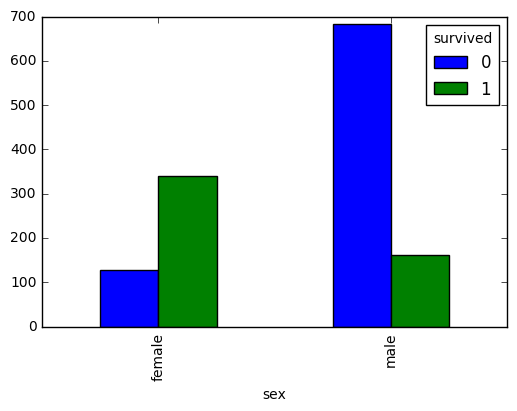

In [14]:
pd.crosstab(data.sex ,data.survived).plot(kind='bar')

In [15]:
df.mean()

survived    0.381971
dtype: float64

In [16]:
339.0/(127+339)

0.7274678111587983

In [17]:
df = data[['pclass','survived']].dropna()
pd.crosstab(df.pclass, df.survived)

survived,0,1
pclass,,
1,123,200
2,158,119
3,528,181


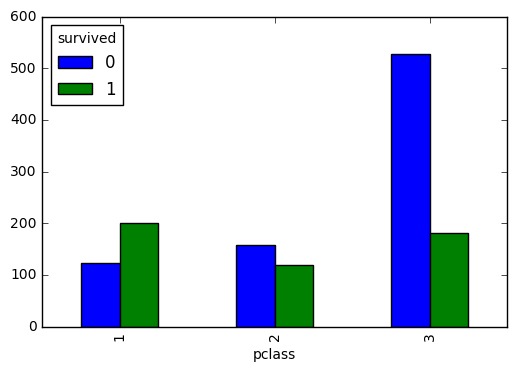

In [18]:
pd.crosstab(data.pclass ,data.survived).plot(kind='bar')

In [19]:
from PIL import Image
from sklearn.cross_validation import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [20]:
tmp = data[['age', 'sex', 'survived']].dropna()
X = tmp[['age', 'sex']]
y = tmp['survived']
X.head()

,age,sex
0,29.00,female
1,0.92,male
2,2.00,female
3,30.00,male
4,25.00,female


In [21]:
X['gender'] = X['sex'].map({'female': 0, 'male': 1}).astype(int)
X = X.drop(['sex'], axis=1)
X.head()

,age,gender
0,29.00,0
1,0.92,1
2,2.00,0
3,30.00,1
4,25.00,0


In [22]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=1)
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)
print 'Accuracy on Training Set: %.3f' % accuracy_score(y_train, y_train_pred)
print 'Accuracy on Validation Set: %.3f' % accuracy_score(y_val, y_val_pred)

Accuracy on Training Set: 0.775
Accuracy on Validation Set: 0.795


In [24]:
def cross_val(clf, X, y, K, random_state=0):
    cv = KFold(len(y), K, shuffle=True, random_state=random_state)
    scores = cross_val_score(clf, X, y, cv=cv)
    return scores

In [25]:
clf = LogisticRegression()
scores = cross_val(clf, X, y, 5)
print 'Scores:', scores
print 'Mean Score: %f ± %.3f' % (scores.mean(), scores.std())

Scores: [ 0.75238095  0.79425837  0.784689    0.77990431  0.784689  ]
Mean Score: 0.779184 ± 0.014


In [26]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=2)
scores = cross_val(clf, X, y, 5)
print 'Scores:', scores
print 'Mean Score: %f ± %.3f' % (scores.mean(), scores.std())

Scores: [ 0.75714286  0.80861244  0.77033493  0.784689    0.78947368]
Mean Score: 0.782051 ± 0.017


In [27]:
clf.fit(X, y)
export_graphviz(clf, out_file='tree.dot')

In [28]:
!dot -Tpng tree.dot -o tree.png

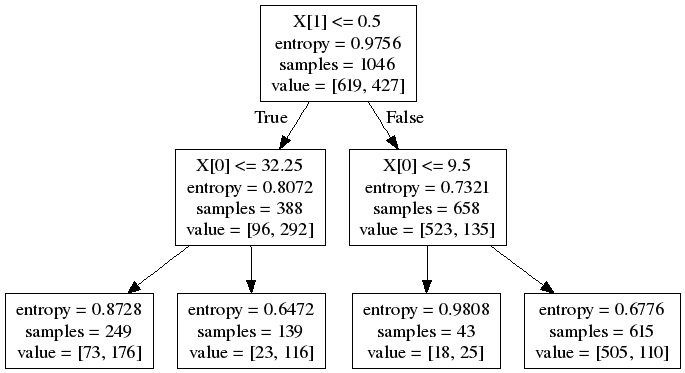

In [29]:
Image.open("tree.png") 